In [ ]:
from verification_net import VerificationNet
from stacked_mnist import StackedMNIST, DataMode

In [1]:
import matplotlib.pyplot as plt

import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST

In [12]:
mode = DataMode.MONO 

In [13]:
trainset = StackedMNIST(train=True, mode=mode)
testset = StackedMNIST(train=False, mode=mode)

/Users/arthurtestard/envs/ntnu/deeplearning/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


In [14]:
net = VerificationNet(force_learn=False, file_name='models/verification_model')

In [15]:
net.train(trainset=trainset, valset=testset, epochs=15, batch_size=1024)

True

[]

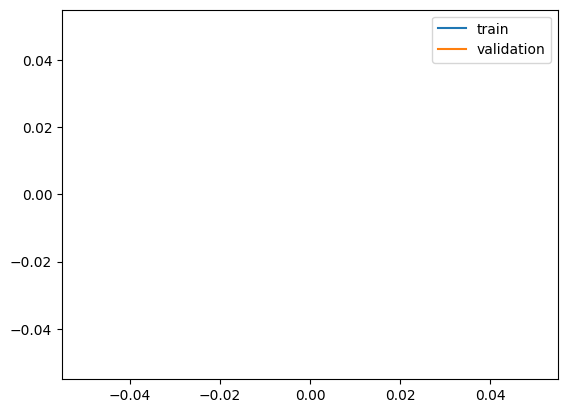

In [16]:
plt.figure()
plt.plot(net.losses, label="train")
plt.plot(net.val_loss, label="validation")
plt.legend()
plt.plot()

In [17]:
batch_size = 25000

In [18]:
train_set = DataLoader(trainset, shuffle=True, batch_size=batch_size)

for idx, (imgs, targets, labels) in enumerate(train_set, 0):
    labels = labels.to('cpu').detach().numpy()
    break

In [22]:
cov = net.check_class_coverage(data=imgs, tolerance=.8)
pred, acc = net.check_predictability(data=imgs, correct_labels=labels, tolerance=.8)
print(f"Coverage: {100*cov:.2f}%")
print(f"Predictability: {100*pred:.2f}%")
print(f"Accuracy: {100 * acc:.2f}%")

Coverage: 100.00%
Predictability: 99.68%
Accuracy: 98.94%


In [23]:
from torchvision.transforms import ToPILImage

img = ToPILImage()(imgs[0])
img